C:\Users\HP\AppData\Local\Temp\ipykernel_15792\850824660.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='linear', inplace=True)


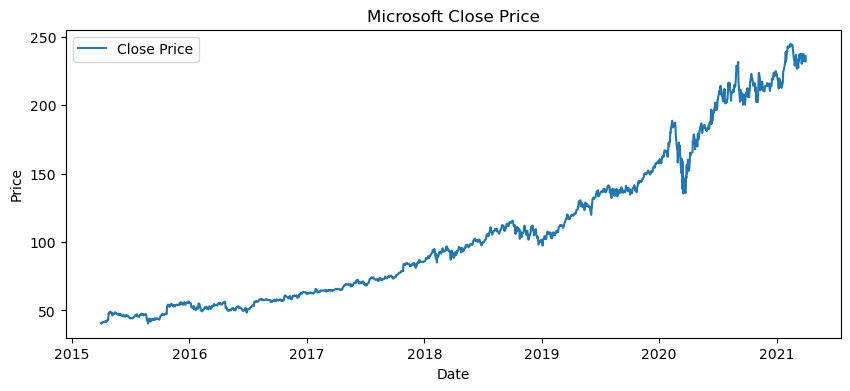

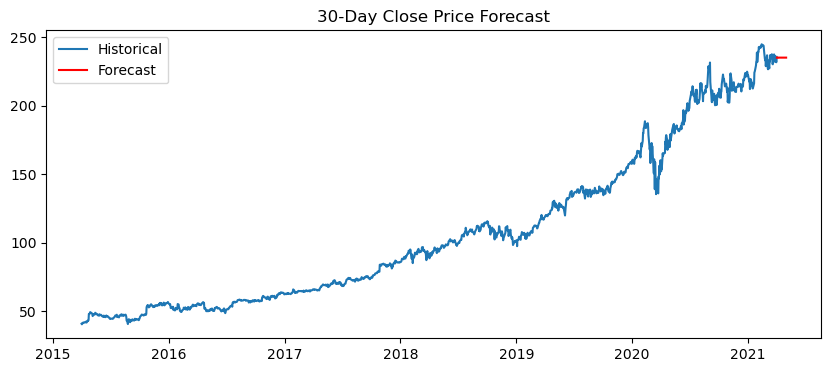

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load and prepare data
df = pd.read_csv("C:/Users/HP/Downloads/archive (4)/Microsoft_Stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')  # Set daily frequency (fill missing)
df['Close'].interpolate(method='linear', inplace=True)

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Close Price')
plt.title('Microsoft Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# ARIMA Model
model = ARIMA(df['Close'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Forecast next 30 days

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('30-Day Close Price Forecast')
plt.legend()
plt.show()